# Project: Investigate a Dataset - [No_Show_Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

| column_name| Data Type | Meaning |
| --- | --- | --- |
| PatientId | float | Unique ID for each patient |
| appointmentID | int | Unique ID for each appointment |
| Gender | string | F for female and M for male |
| ScheduledDay | string | Date the patient scheduled the appointment on |
| appointmentDay | string | Date of appointment |
| Age | int | Age of the patient |
| Neighbourhood | string | Location of the hospital |
| Scholarship | int |  Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família (0 or 1) |
| Hipertension | int | Indicates whether or not the patient is diagnosed with hypertension (0 or 1) |
| Diabetes | int | Indicates whether or not the patient is diagnosed with diabetes (0 or 1) |
| Alcoholism | int | Indicates whether or not the patient is alcoholic (0 or 1) |
| Handcap | int | Indicates whether or not the patient has disabilities with 4 levels (0, 1 , 2 , 4) |
| SMS_Recieved | int | Indicates whether or not the patient recieved an sms for the appointment (0 or 1) |
| No_Show | string | Indicates whether or not the patient showed-up for the appointment (Yes or No) |




### Question(s) for Analysis
<ol>
    <li>genders show-up ratio</li>
    <li>The most likely ages to show-up on their appointment.</li>
    <li>Are patients enrolled in Brasilian welfare program Bolsa Família more likely to show_up?</li>
    <li>How does the location of the hospital affect the show-up rate?</li>
    <li>Are there specific days patients show-up on more than other days?</li>
    <li>Are patients with other medical issues more likely to show-up?</li>
    <li>Does recieving sms has something to do with the patient showing-up? </li>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **In the Data wrangling Process**:
    <ol>
        <li>The dataset doesn't contain any missing values.</li>
        <li>PatientId and appointmentID are not necessary for the analysis.</li>
        <li>columns [" ScheduledDay ", " AppointmentDay "] data type is string but it should be datetime</li>
        <li>Age column has negative value -1 should be removed.</li>
        <li>Dataset doesn't contain duplicates.</li>
        

In [2]:
# Load your data and print out a few lines
no_show_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# inspect shape of dataframe
no_show_df.shape

(110527, 14)

The dataset contains 110527 rows and 14 columns

In [4]:
#inspect column names
no_show_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
# Examine datatypes of the columns and check for null values
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


ScheduledDay, AppointmentDay should be converted to datetime.<br>
No missing values.

In [6]:
# check for duplicated rows
no_show_df.duplicated().sum()

0

No Duplicated Rows

In [7]:
# check  the values within the age column
no_show_df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

Age column contains negative value (-1).

In [8]:
#check values for tha binary columns(yes-no columns) and the handicap levels
print(no_show_df.Scholarship.unique())
print(no_show_df.Hipertension.unique())
print(no_show_df.Diabetes.unique())
print(no_show_df.Alcoholism.unique())
print(no_show_df.Handcap.unique())

[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]


All the above columns' values are either 0 or 1 except for handicap which consists of levels either 0 or a level from (1-4).

In [9]:
# perfrom some statistics on the numeric columns within the dataframe ro examine mean,std,quartiles and other values
no_show_df[['Age','Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].describe()[1:]

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>],
       [<AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>],
       [<AxesSubplot:title={'center':'SMS_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

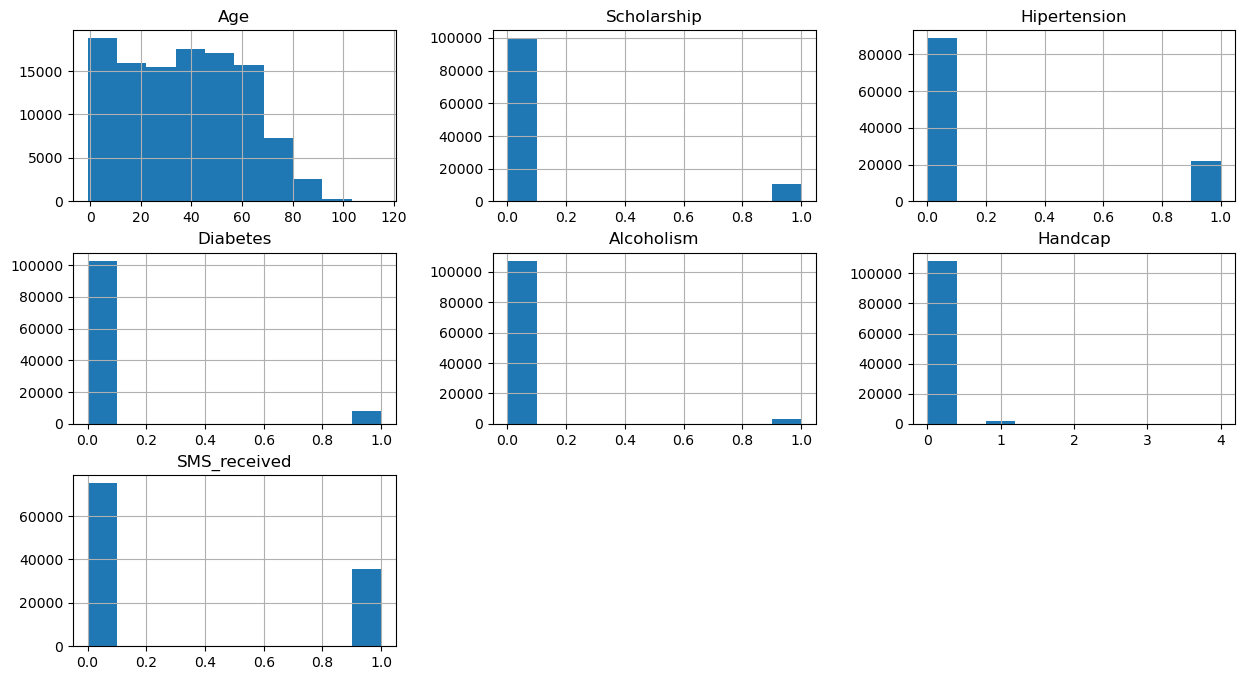

In [10]:
# plot histogram for numeric columns within the datafram
no_show_df[['Age','Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].hist(figsize = (15,8))

Age is nearly equally distributed from age 0 to 60 then decreases.<br>
Patients enrolled in Brasilian welfare program Bolsa Família are more than those who aren't.<br>
Patients diagnosed with hipertension are less than those who aren't.<br>
Non-diabetic patients are more than diabetic patients.<br>
Non-alcoholic patients are more than alcoholics.<br>
Patients with no disabilities are more than handicapped patients.<br>
Patients who recieved an sms are more than those who didn't.<br>


### Data Cleaning
 

In [11]:
# dropping unnecessary columns for the analysis process
no_show_df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

Dropping unnecessary columns: PatientId and AppointmentID columns.

In [12]:
# use clean and easy column names (clean columns' names)
labels = ['gender','schedule_day', 'appointment_day', 'age', 'neighbourhood','scholarship','hypertension','diabetes','alcoholism','handicap','sms_recieved','no_show']
no_show_df.columns = labels
no_show_df.head()

,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_recieved,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Renamed the columns to be more consistent and easier to access.

In [13]:
# remove negative values from age column
no_show_df = no_show_df[no_show_df['age']>=0]
no_show_df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

Removed negative values from age column.

In [14]:
#fix datatype of datetime columns
no_show_df['schedule_day'] = no_show_df['schedule_day'].astype('datetime64[ns]')
no_show_df['appointment_day'] = no_show_df['appointment_day'].astype('datetime64[ns]')
no_show_df.dtypes

gender                     object
schedule_day       datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_recieved                int64
no_show                    object
dtype: object

Data types of date columns are modified to datetime.

In [15]:
# create a new column (appointment_weekday) that stores dayname in a separate column to be easier to access and perfrom analysis
no_show_df['appointment_weekday'] = no_show_df['appointment_day'].dt.strftime('%A')
no_show_df['appointment_weekday'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: appointment_weekday, dtype: int64

In [16]:
#check for any inconsistent dates between appointment_day column and schedule_day column
# appointment day should be the same as scedule day or after it
no_show_df[(no_show_df['appointment_day'].dt.date < no_show_df['schedule_day'].dt.date)]

,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_recieved,no_show,appointment_weekday
27033,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday
55226,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday
64175,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday
71533,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday
72362,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday


The dataset contains schedule_day that is after appointment_day.

In [17]:
# dropping rows with inconsistent dates between appointment_day column and schedule_day column
no_show_df = no_show_df[(no_show_df['appointment_day'].dt.date >= no_show_df['schedule_day'].dt.date)]
no_show_df[(no_show_df['appointment_day'].dt.date < no_show_df['schedule_day'].dt.date)]

,gender,schedule_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_recieved,no_show,appointment_weekday


Removed rows with schedule_day that is after appointment_day.

<a id='eda'></a>
## Exploratory Data Analysis


In [18]:
# Defining a function that returns value counts of specific columns within the dataframe
def total_df(name):
    return no_show_df[name].value_counts()

In [19]:
# Defining a function that returns value counts of specific columns within the dataframe where the patient showed-up
# (no_show = no)
def all_show_up(name):
    return no_show_df[no_show_df['no_show']=='No'][name].value_counts()

In [20]:
# define seaborn barplot function that takes a column to plot with xlabel, ylabel and title
def plot_sns(column,xlabel,ylabel,title):
    sns.barplot(x=column.index,y=column)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [21]:
# categorize genders and show-up and count their values
gender_show_rate = no_show_df.groupby(['gender'])['no_show'].value_counts()
gender_show_rate

gender  no_show
F       No         57245
        Yes        14591
M       No         30962
        Yes         7723
Name: no_show, dtype: int64

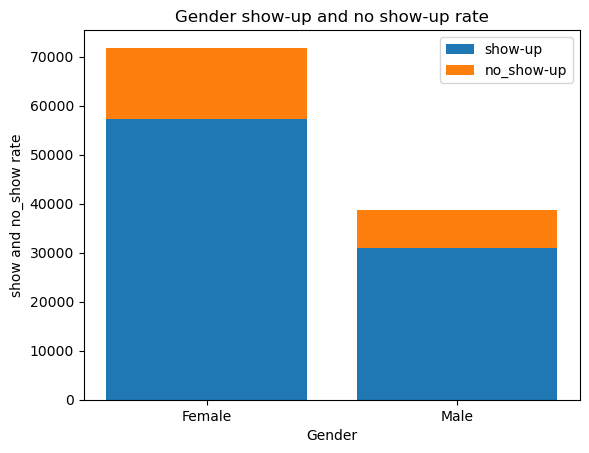

In [22]:
# plot stacked bar chart for show-up and no-show-up appointments with genders
show_up = (gender_show_rate['F','No'],gender_show_rate['M','No'])
no_show_up = (gender_show_rate['F','Yes'],gender_show_rate['M','Yes'])
ind = [1,2]
fig, ax = plt.subplots()
ax.bar(ind, show_up,label='show-up')
ax.bar(ind, no_show_up,bottom = show_up,label='no_show-up')
ax.set_xticks(ind, labels=['Female','Male'])
ax.set_xlabel('Gender')
ax.set_ylabel('show and no_show rate')
ax.set_title('Gender show-up and no show-up rate')
plt.legend()
plt.show();

It is remarkable that more females make appointments than males.

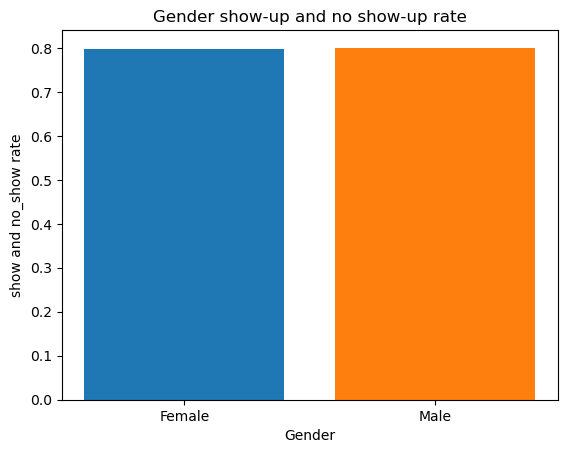

In [23]:
# look at the proportions of the gender-show-up rate
total_gender= no_show_df['gender'].value_counts()
fig, ax = plt.subplots()
ax.bar("Female", gender_show_rate['F','No']/total_gender['F'])
ax.bar("Male", gender_show_rate['M','No']/total_gender['M'])
ax.set_xlabel('Gender')
ax.set_ylabel('show and no_show rate')
ax.set_title('Gender show-up and no show-up rate')
plt.show();

but their proportions are nearly equal with 80% of showing-up to scheduled appointments.

### 2- Age show-up and no show-up rate:

In [24]:
# get all value counts for age column of patients that showed up for their appointments using a predefined function
age_show_up = all_show_up('age')
age_show_up

0      2900
1      1858
52     1449
56     1372
2      1366
       ... 
98        5
100       4
102       2
115       2
99        1
Name: age, Length: 103, dtype: int64

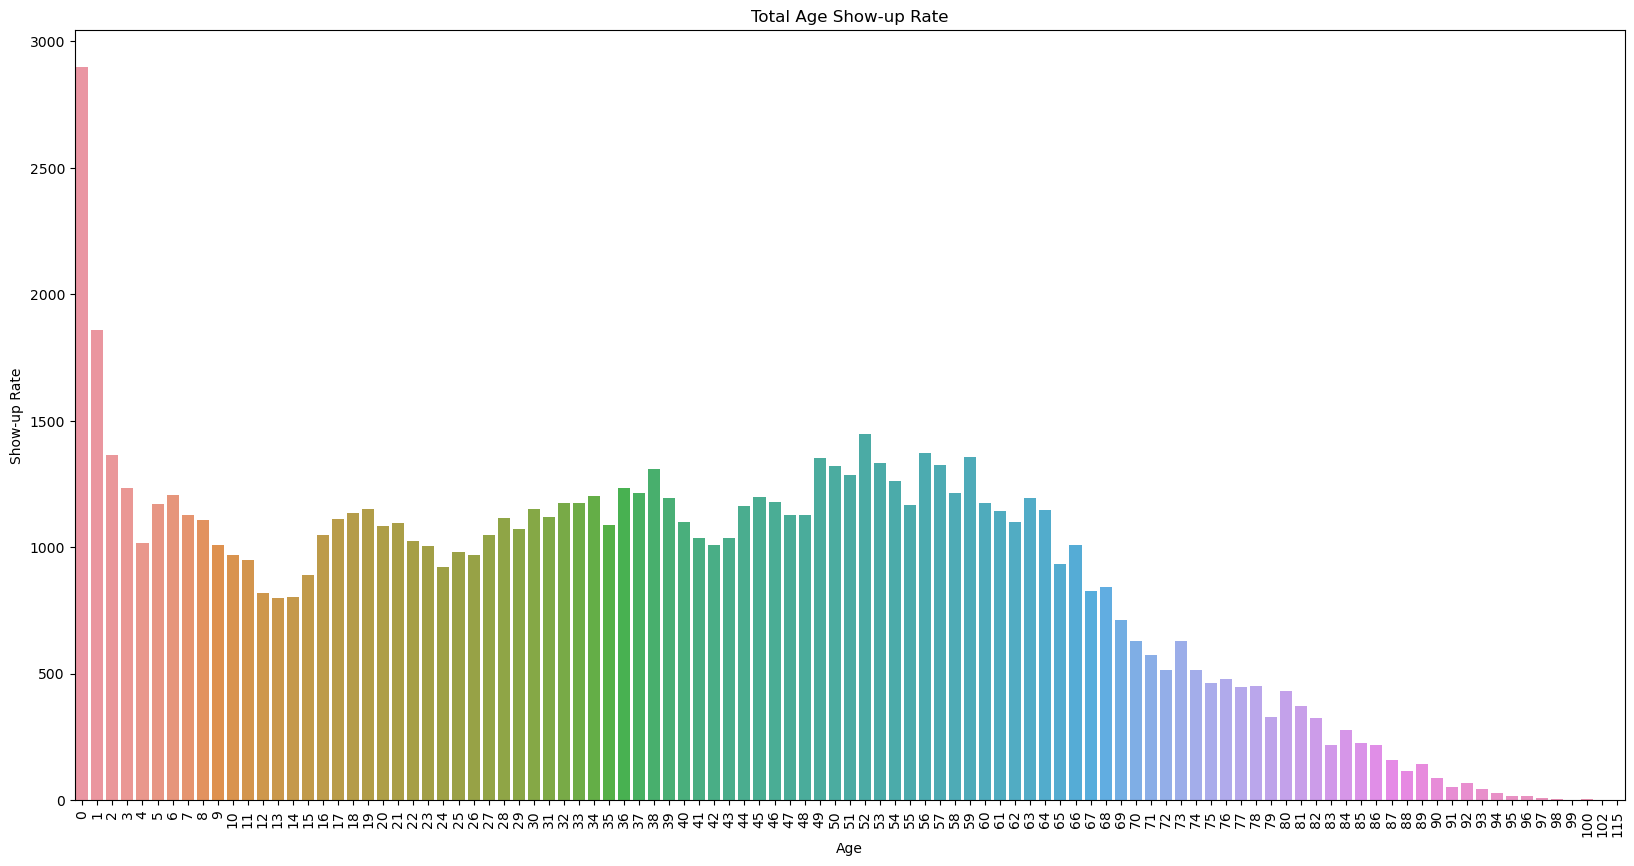

In [25]:
# plot the age and count of appointment in a seaborn barplot using a predefined function
fig, ax = plt.subplots(figsize=(20,10))
plot_sns(age_show_up,'Age','Show-up Rate','Total Age Show-up Rate')
plt.xticks(rotation=90)
plt.show();

young age patients appear to schedule more appointments.

In [26]:
# get all value counts for age column using a predefined function
total_age = total_df('age')
total_age

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

In [27]:
# get the proportions
age_proportion = age_show_up/total_age
age_proportion

0      0.819441
1      0.817422
2      0.844252
3      0.816920
4      0.782910
         ...   
98     0.833333
99     1.000000
100    1.000000
102    1.000000
115    0.400000
Name: age, Length: 103, dtype: float64

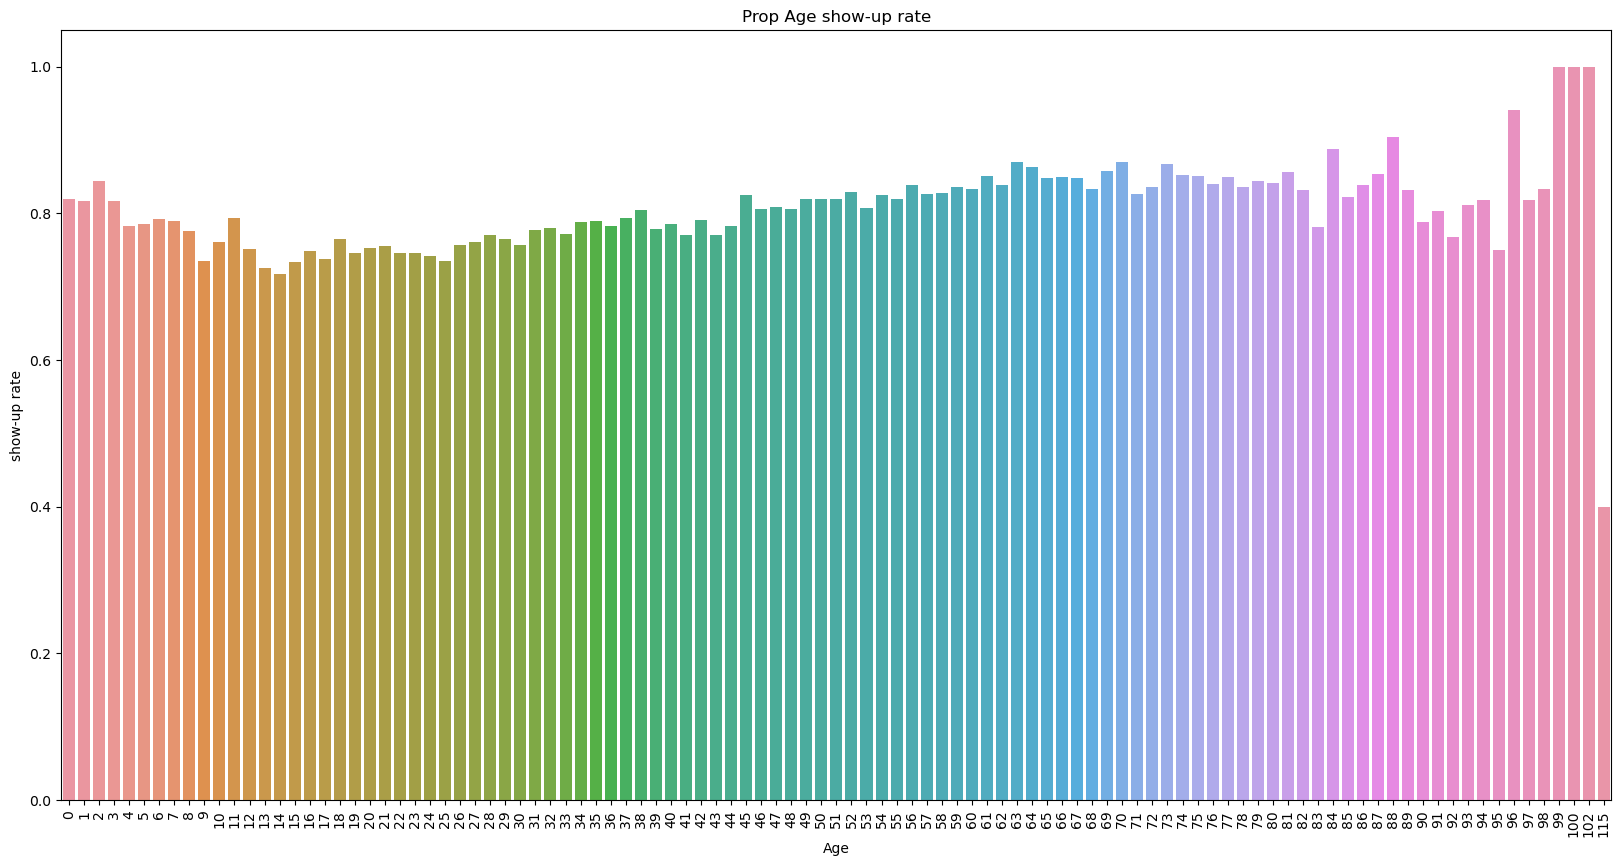

In [28]:
# plot the proportions in a seaborn barplot using a predefined function
fig, ax = plt.subplots(figsize=(20,10))
plot_sns(age_proportion,'Age','show-up rate','Prop Age show-up rate')
plt.xticks(rotation=90)
plt.show();

But looking at age proportions they are nearly equal and even higher in old ages(99-102 years)

In [29]:
# dividing patients' ages into 2 groups(below mean age and above mean age)
below_mean_age = sum(age_show_up[age_show_up.keys()<37])/sum(total_age[total_age.keys()<37])
above_mean_age = sum(age_show_up[age_show_up.keys()>=37])/sum(total_age[total_age.keys()>=37])
below_mean_age,above_mean_age

(0.7720593624038109, 0.8235104842602027)

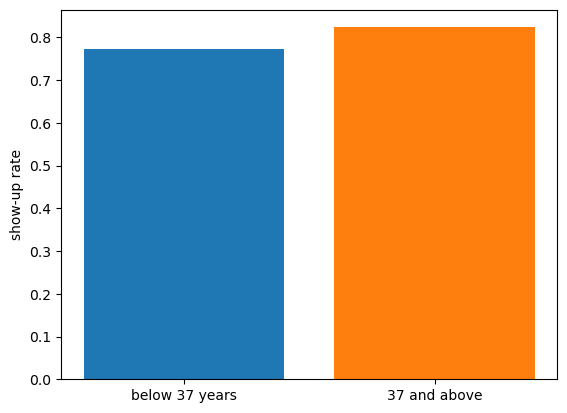

In [30]:
# bar plot the 2 groups
fig, ax = plt.subplots()
ax.bar("below 37 years",below_mean_age)
ax.bar("37 and above",above_mean_age)
ax.set_ylabel('show-up rate')
plt.show();

Patients above average age(37 years) appear to show up to their appointments more than patients below average age.

### 3- Are patients enrolled in Brasilian welfare program Bolsa Família more likely to show_up?

In [31]:
# get value counts of scholarship column
total_welfare = total_df('scholarship')
total_welfare

0    99660
1    10861
Name: scholarship, dtype: int64

In [32]:
# categorize scholarship and no_show columns and count their values
welfare_show_up = no_show_df.groupby('no_show')['scholarship'].value_counts()
welfare_show_up

no_show  scholarship
No       0              79924
         1               8283
Yes      0              19736
         1               2578
Name: scholarship, dtype: int64

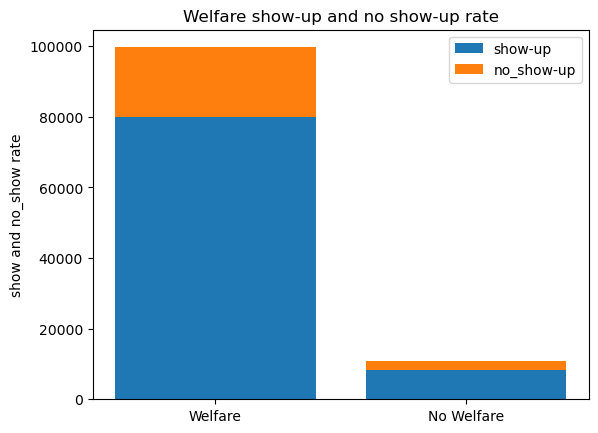

In [33]:
# plot stacked bar chart for show-up and no-show-up appointments with scholarship 
show_up = (welfare_show_up['No'])
no_show_up = (welfare_show_up['Yes'])
ind = [1,2]
fig, ax = plt.subplots()
ax.bar(ind, show_up,label='show-up')
ax.bar(ind, no_show_up,bottom = show_up,label='no_show-up')
ax.set_xticks(ind, labels=['Welfare','No Welfare'])
ax.set_ylabel('show and no_show rate')
ax.set_title('Welfare show-up and no show-up rate')
plt.legend()
plt.show();

Patients enrolled in Brasilian welfare program Bolsa Família are more likely to make appointments.

In [34]:
# get welfare proportions
welfare_prop_show = welfare_show_up['No']/total_welfare
welfare_prop_show

scholarship
0    0.801967
1    0.762637
Name: scholarship, dtype: float64

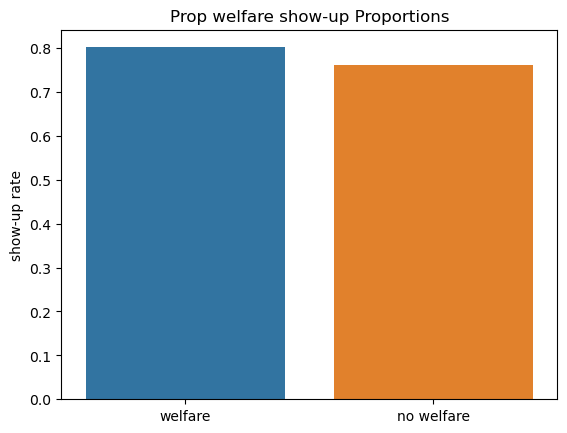

In [35]:
# bar plot the proportions
sns.barplot(x=['welfare','no welfare'],y=welfare_prop_show)
plt.ylabel('show-up rate')
plt.title('Prop welfare show-up Proportions')
plt.show();

And by looking at the proportions: patients enrolled in Brasilian welfare program Bolsa Família are more likely to show-up to their appointments.

### 4-How does the location of the hospital affect the show-up rate?

In [36]:
# get all the neighbourhood and count the show-up values then arrange them descendingly
neighbourhood_show_up = all_show_up('neighbourhood')
neighbourhood_show_up.sort_values(ascending=False)
neighbourhood_show_up

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

In [37]:
# get value counts for all neighbourhoods
neighbourhood_all = total_df('neighbourhood')
neighbourhood_all

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [38]:
# get neighbourhood proportions
neighbourhood_prop = (neighbourhood_show_up/neighbourhood_all)[:20]
neighbourhood_prop

AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
BELA VISTA             0.798637
BENTO FERREIRA         0.775058
BOA VISTA              0.814103
BONFIM                 0.801659
CARATOÍRA              0.769591
CENTRO                 0.789142
COMDUSA                0.819355
CONQUISTA              0.811543
CONSOLAÇÃO             0.828364
CRUZAMENTO             0.782546
DA PENHA               0.806495
DE LOURDES             0.845902
DO CABRAL              0.842857
DO MOSCOSO             0.777240
DO QUADRO              0.835100
Name: neighbourhood, dtype: float64

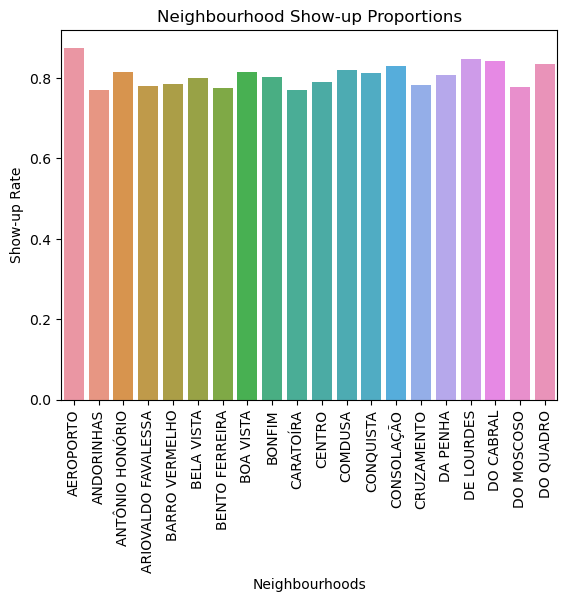

In [39]:
# plot top 20 Neighbourhoods and their show-up rate in bar plot using a predefined function
plot_sns(neighbourhood_prop,'Neighbourhoods','Show-up Rate','Neighbourhood Show-up Proportions')
plt.xticks(rotation=90)
plt.show();

Top 20 hospital locations with their proportions of show_up to appointments.

### 5-Are there specific days patients show-up on more than other days?

In [40]:
# value counts for weekdays
all_days = total_df('appointment_weekday')
all_days

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: appointment_weekday, dtype: int64

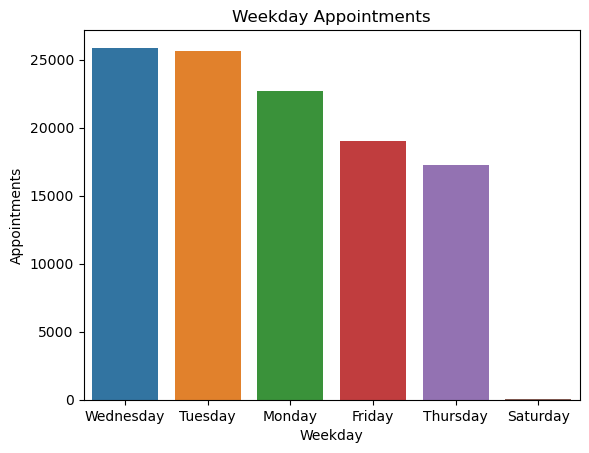

In [41]:
# bar plot for the days with their value counts
plot_sns(all_days,'Weekday','Appointments','Weekday Appointments')
plt.show();

Wednesday and Tuesday have the highest schedule appointment counts.

In [42]:
# get weekdays proportions for show-up rate
prop_days = all_show_up('appointment_weekday')/all_days
prop_days

Wednesday    0.803139
Tuesday      0.799126
Monday       0.793554
Friday       0.787739
Thursday     0.806506
Saturday     0.769231
Name: appointment_weekday, dtype: float64

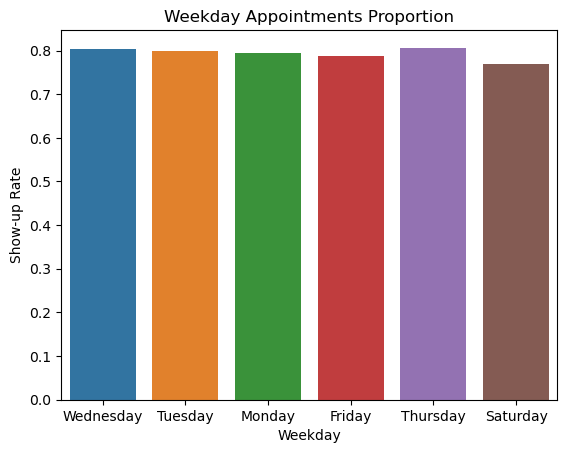

In [43]:
# bar plot the proportions
plot_sns(prop_days,'Weekday','Show-up Rate','Weekday Appointments Proportion')
plt.show();

Weekday Proportions for show-up Rate is nearly the same for all days.

### 6-Are patients with other medical issues more likely to show-up?

In [44]:
# calculate proportions for hypertension, show-up rate
hypertension_prop = all_show_up('hypertension')/total_df('hypertension')
hypertension_prop

0    0.791005
1    0.826980
Name: hypertension, dtype: float64

In [45]:
# calculate proportions for diabetes, show-up rate
diabetes_prop = all_show_up('diabetes')/total_df('diabetes')
diabetes_prop

0    0.796409
1    0.819967
Name: diabetes, dtype: float64

In [46]:
# calculate proportions for alcoholism, show-up rate
alcoholism_prop = all_show_up('alcoholism')/total_df('alcoholism')
alcoholism_prop

0    0.798089
1    0.798512
Name: alcoholism, dtype: float64

In [47]:
# calculate proportions for handicap, show-up rate
handicap_prop = all_show_up('handicap')/total_df('handicap')
handicap_prop

0    0.797667
1    0.821569
2    0.797814
3    0.769231
4    0.666667
Name: handicap, dtype: float64

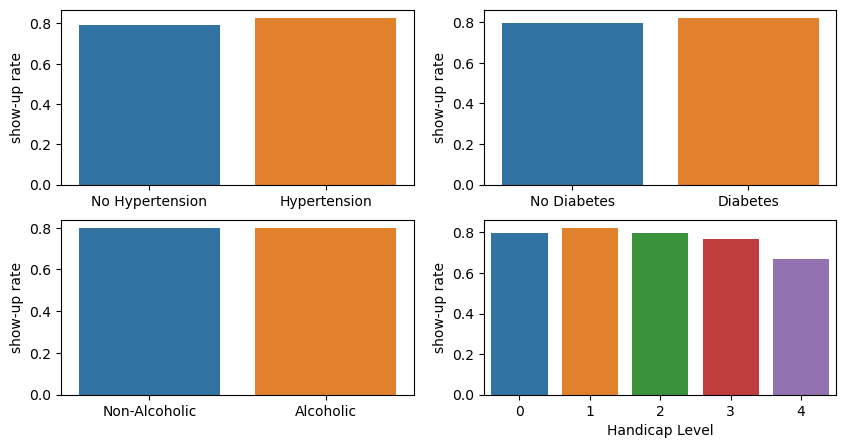

In [48]:
# create a 2*2 plot for the 4 proportions
fig,ax = plt.subplots(2,2,figsize=(10,5))
sns.barplot(ax=ax[0][0],x = ['No Hypertension','Hypertension'],y=hypertension_prop)
ax[0][0].set_ylabel('show-up rate')
sns.barplot(ax=ax[0][1],x=['No Diabetes','Diabetes'],y=diabetes_prop)
ax[0][1].set_ylabel('show-up rate')
sns.barplot(ax=ax[1][0],x=['Non-Alcoholic','Alcoholic'],y=alcoholism_prop)
ax[1][0].set_ylabel('show-up rate')
sns.barplot(ax=ax[1][1],x=handicap_prop.index,y=handicap_prop)
ax[1][1].set_xlabel('Handicap Level')
ax[1][1].set_ylabel('show-up rate')
plt.show();

### 7-Does recieving sms has something to do with the patient showing-up?

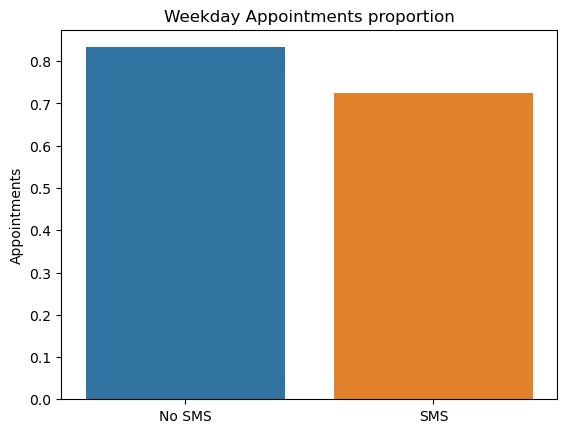

In [49]:
# calculate proportions for sms_recieved, show-up rate
# create bar plot for the proportions
sms_prop = all_show_up('sms_recieved')/total_df('sms_recieved')
fig, ax = plt.subplots()
sns.barplot(x=["No SMS","SMS"], y=sms_prop)
plt.ylabel('Appointments')
plt.title('Weekday Appointments proportion')
plt.show();

<a id='conclusions'></a>
## Conclusions


1) Females make more appointments than males while the proportions state that they show-up to about 80% of their appointments.<br>
2) Young aged patients (0-3) years schedule more appointments but in proportions, show-up rate is nearly the same for all ages and rises from (99-102) years 100% with  a drop at the age of 115 to 40%.<br>
3) Patients at ages from 37 and above show-up to 82% of their appointments which is higher than those below 37 years.<br>
4) Patients enrolled in Brasilian welfare program Bolsa Família are more likely to make appointments and show-up to 80% of these appointments.<br>
5) AEROPORTO neighbourhood has the highest show-up rate of about 87%.<br>
6) Wednesday and Tuesday have the highest schedule appointment counts.<br>
7) all weekdays nearly have the same show-up rate proportions but sunday doesn't have any appointments.<br>
8) Patients with hypertention or diabetes show-up to more appointments than those who don't.<br>
9) patients with level 1 handicap have the highest show-up rate.<br>
10) Patients that recieve sms are less likely to show-up to their appointments which is an unexpected behavior.<br>

## Limitations
1) Data contains age outliers at 115 years.<br>
2) Unexpected behavior of sms_recieved column with no_show column.<br>
3) Data can be further investigated with more advanced statistics.<br>